<a href="https://colab.research.google.com/github/mayzhangmei/Tensorflow/blob/master/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

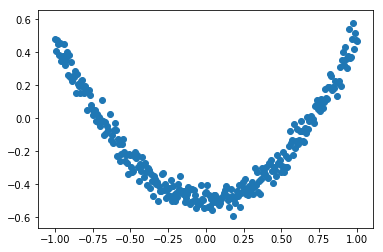

In [10]:
#from _future_ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
  #add one more layer and return the ouput of this layer
  Weights = tf.Variable(tf.random_normal([in_size, out_size]))
  biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
  Wx_plus_b = tf.matmul(inputs, Weights) + biases
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
  return outputs

#make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

#define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

#add hiddern layer
l1 = add_layer(xs, 1, 10, activation_function = tf.nn.relu)

#add output layer
prediction = add_layer(l1, 10, 1, activation_function = None)

#the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), 
                                    reduction_indices = [1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
  #training
  sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
  if i%50 == 0:
    try:
      ax.lines.remove(lines[0])
    except Exception:
      pass
    prediction_value = sess.run(prediction, feed_dict={xs:x_data})
    lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
    
    plt.pause(0.1)
    
    # to see the step improvemennt
    # print(sess.run(loss, feed_dict = {xs:x_data, ys:y_data}))